Files already downloaded and verified
Files already downloaded and verified
111111111
conv1.weight
bn1.weight
bn1.bias
bn1.running_mean
bn1.running_var
bn1.num_batches_tracked
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.bn1.running_mean
layer1.0.bn1.running_var
layer1.0.bn1.num_batches_tracked
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.0.bn2.running_mean
layer1.0.bn2.running_var
layer1.0.bn2.num_batches_tracked
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.bn1.running_mean
layer1.1.bn1.running_var
layer1.1.bn1.num_batches_tracked
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer1.1.bn2.running_mean
layer1.1.bn2.running_var
layer1.1.bn2.num_batches_tracked
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.bn1.running_mean
layer2.0.bn1.running_var
layer2.0.bn1.num_batches_tracked
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.bn2.running_mean
layer2.0.bn2.runni

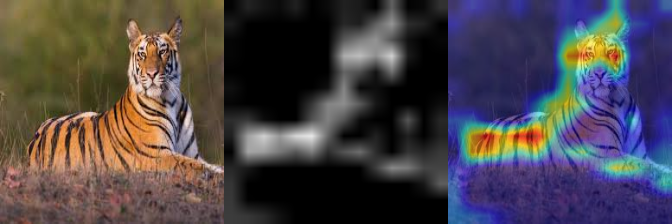

In [22]:
import warnings
warnings.filterwarnings('ignore')
from torchvision import models
import numpy as np
import cv2
import requests
import sys
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, \
    deprocess_image, \
    preprocess_image
from PIL import Image
import argparse
import os.path as osp
import os
from datetime import datetime
import json
from collections import defaultdict as dd

import numpy as np

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data as torch_data
from torch.utils.data import Dataset, DataLoader, Subset
import sys
sys.path.append('/home/gpu2/sunt/jbw/knockoffnets')
import knockoff.config as cfg
from knockoff import datasets
import knockoff.utils.transforms as transform_utils
import knockoff.utils.model as model_utils
import knockoff.utils.utils as knockoff_utils
import knockoff.models.zoo as zoo

# ----------- Set up dataset
dataset_name = 'CIFAR100'
valid_datasets = datasets.__dict__.keys()
if dataset_name not in valid_datasets:
    raise ValueError('Dataset not found. Valid arguments = {}'.format(valid_datasets))
dataset = datasets.__dict__[dataset_name]

modelfamily = datasets.dataset_to_modelfamily[dataset_name]
train_transform = datasets.modelfamily_to_transforms[modelfamily]['train']
test_transform = datasets.modelfamily_to_transforms[modelfamily]['test']
trainset = dataset(train=True, transform=train_transform)
testset = dataset(train=False, transform=test_transform)
num_classes = len(trainset.classes)

# ----------- Set up model
model_name = 'resnet18'
pretrained = 'imagenet'
torch.manual_seed(17)
# model = model_utils.get_net(model_name, n_output_classes=num_classes, pretrained=pretrained)
model = zoo.get_net(model_name, modelfamily, pretrained, num_classes=num_classes)

# torch.save(model.state_dict(), './victim_model.pt')

# model = models.resnet50(pretrained=True)
model.load_state_dict(torch.load('./victim_model.pt'))
model.eval()

image_url = "https://th.bing.com/th/id/R.94b33a074b9ceeb27b1c7fba0f66db74?rik=wN27mvigyFlXGg&riu=http%3a%2f%2fimages5.fanpop.com%2fimage%2fphotos%2f31400000%2fBear-Wallpaper-bears-31446777-1600-1200.jpg&ehk=oD0JPpRVTZZ6yizZtGQtnsBGK2pAap2xv3sU3A4bIMc%3d&risl=&pid=ImgRaw&r=0"
# image_url = "https://th.bing.com/th/id/OIP.Rpes-jNGpa1WmJjkcRTXFwHaFj?rs=1&pid=ImgDetMain"
img = np.array(Image.open(requests.get(image_url, stream=True).raw))
img = np.array(Image.open('./tiger.jpg'))
img = cv2.resize(img, (224, 224))
img = np.float32(img) / 255
input_tensor = preprocess_image(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# The target for the CAM is the Bear category.
# As usual for classication, the target is the logit output
# before softmax, for that category
targets = [ClassifierOutputTarget(43)]
target_layers = [model.layer3[0]]
# target_layers = [model.conv1]
with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
cam1 = np.uint8(255*grayscale_cams[0, :]*0.9)
cam1 = cv2.merge([cam1, cam1, cam1])
images = np.hstack((np.uint8(255*img), cam1 , cam_image))
Image.fromarray(images)

111111111
conv1.weight
bn1.weight
bn1.bias
bn1.running_mean
bn1.running_var
bn1.num_batches_tracked
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.bn1.running_mean
layer1.0.bn1.running_var
layer1.0.bn1.num_batches_tracked
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.0.bn2.running_mean
layer1.0.bn2.running_var
layer1.0.bn2.num_batches_tracked
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.bn1.running_mean
layer1.1.bn1.running_var
layer1.1.bn1.num_batches_tracked
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer1.1.bn2.running_mean
layer1.1.bn2.running_var
layer1.1.bn2.num_batches_tracked
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.bn1.running_mean
layer2.0.bn1.running_var
layer2.0.bn1.num_batches_tracked
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.bn2.running_mean
layer2.0.bn2.running_var
layer2.0.bn2.num_batches_tracked
layer2.0.downsample.0.weight
layer2.

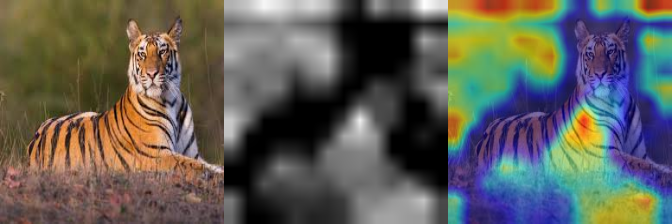

In [20]:
# ----------- Set up model
model_name1 = 'resnet18'
pretrained1 = 'imagenet'
torch.manual_seed(17)
# model = model_utils.get_net(model_name, n_output_classes=num_classes, pretrained=pretrained)
model1 = zoo.get_net(model_name, modelfamily, pretrained1, num_classes=num_classes)
    
model1.load_state_dict(torch.load('./pretrained_model.pt'))
model1.eval()
image_url = "https://th.bing.com/th/id/R.94b33a074b9ceeb27b1c7fba0f66db74?rik=wN27mvigyFlXGg&riu=http%3a%2f%2fimages5.fanpop.com%2fimage%2fphotos%2f31400000%2fBear-Wallpaper-bears-31446777-1600-1200.jpg&ehk=oD0JPpRVTZZ6yizZtGQtnsBGK2pAap2xv3sU3A4bIMc%3d&risl=&pid=ImgRaw&r=0"
# image_url = "https://th.bing.com/th/id/OIP.Rpes-jNGpa1WmJjkcRTXFwHaFj?rs=1&pid=ImgDetMain"
img2 = np.array(Image.open(requests.get(image_url, stream=True).raw))
img2 = np.array(Image.open('./tiger.jpg'))
img2 = cv2.resize(img2, (224, 224))
img2 = np.float32(img2) / 255
input_tensor2 = preprocess_image(img2, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# The target for the CAM is the Bear category.
# As usual for classication, the target is the logit output
# before softmax, for that category
targets = [ClassifierOutputTarget(43)]
target_layers = [model1.layer3[0]]
# target_layers = [model1.conv1]
with GradCAM(model=model1, target_layers=target_layers) as cam:
    grayscale_cams2 = cam(input_tensor=input_tensor2, targets=targets)
    cam_image2 = show_cam_on_image(img2, grayscale_cams2[0, :], use_rgb=True)
cam2 = np.uint8(255*grayscale_cams2[0, :])
cam2 = cv2.merge([cam2, cam2, cam2])
images2 = np.hstack((np.uint8(255*img2), cam2, cam_image2))
Image.fromarray(images2)